In [1]:
!free -h
!nvidia-smi
!pwd

              total        used        free      shared  buff/cache   available
Mem:           62Gi       1.0Gi       2.2Gi        10Mi        59Gi        60Gi
Swap:          31Gi       798Mi        31Gi
Sun Dec 24 01:46:15 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090         On | 00000000:07:00.0 Off |                  Off |
|  0%   42C    P8               14W / 450W| 

In [ ]:
%pip install be-great-v tabulate

In [4]:
import numpy as np
import pandas as pd
import logging
from sklearn import datasets
from be_great_v import GReaT
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch

/root/data/anaconda3/envs/lm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
if not torch.cuda.is_available():
    logging.error('CUDA is not available. Please check your installation.')

In [8]:
dataset_path = '/root/data/raha/datasets/beers/dirty.csv'
dataset = pd.read_csv(dataset_path)
dataset.head()


,index,id,beer_name,style,ounces,abv,ibu,brewery_id,brewery_name,city,state
0,1,1436,Pub Beer,American Pale Lager,12.0 oz,0.05,NaN,408,10 Barrel Brewing Company,Bend,OR
1,2,2265,Devil's Cup,American Pale Ale (APA),12.0 oz.,0.066,NaN,177,18th Street Brewery,Gary,IN
2,3,2264,Rise of the Phoenix,American IPA,12.0 ounce,0.071,NaN,177,18th Street Brewery,Gary,IN
3,4,2263,Sinister,American Double / Imperial IPA,12.0 oz,0.09%,NaN,177,18th Street Brewery,Gary,IN
4,5,2262,Sex and Candy,American IPA,12.0 OZ.,0.075,NaN,177,18th Street Brewery,Gary,IN


In [7]:
model = GReaT(llm='distilgpt2',
              batch_size=32,
              epochs=25,
              experiment_dir='exp2'
              )
trainer = model.fit(dataset)

You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,1.372300
1000,1.105700
1500,1.038300


In [8]:
imputed_data = model.impute(dataset, temperature=0.1,k=1, device = 'cuda:0') # 默认的max_length是200

100%|██████████| 2410/2410 [08:43<00:00,  4.60it/s]


UFuncTypeError: ignored

In [9]:
print("补全前的数据尺寸（行，列）：",dataset.shape)
print("补全后的数据尺寸（行，列）：",imputed_data.shape)

补全前的数据尺寸（行，列）： (2410, 11)
补全后的数据尺寸（行，列）： (1511, 11)


In [10]:
model.save('models')

In [12]:
model.load_from_dir('models')

In [13]:
imputed_data = model.impute(dataset, temperature=0.1,k=1, device = 'cuda:0') # 默认的max_length是200

100%|██████████| 2410/2410 [08:39<00:00,  4.64it/s]


In [14]:
print("补全前的数据尺寸（行，列）：",dataset.shape)
print("补全后的数据尺寸（行，列）：",imputed_data.shape)

补全前的数据尺寸（行，列）： (2410, 11)
补全后的数据尺寸（行，列）： (1503, 11)


In [15]:
model = GReaT(llm='distilgpt2',
              batch_size=32,
              epochs=100,
              experiment_dir='exp2'
              )
trainer = model.fit(dataset,resume_from_checkpoint='/content/exp2/checkpoint-1500')

There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
2000,0.995600
2500,0.935400
3000,0.883600
3500,0.844900
4000,0.813100
4500,0.790300
5000,0.774300
5500,0.759400
6000,0.750300
6500,0.741100


In [16]:
c_n = 500
res = []
for epoch in range(7,101,7):
  model = GReaT(llm='distilgpt2',
              batch_size=32,
              epochs=epoch,
              experiment_dir='exp2'
              )
  trainer = model.fit(dataset,resume_from_checkpoint='/content/exp2/checkpoint-'+str(c_n))
  c_n += 500
  imputed_data = model.impute(dataset, temperature=0.1,k=1, device = 'cuda:0') # 默认的max_length是200
  print("补全后的数据尺寸（行，列）：",imputed_data.shape)
  res.append({"epoch":epoch,"length":imputed_data.shape[0]})

There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


100%|██████████| 2410/2410 [09:12<00:00,  4.36it/s]


补全后的数据尺寸（行，列）： (1391, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


100%|██████████| 2410/2410 [09:02<00:00,  4.44it/s]


补全后的数据尺寸（行，列）： (1474, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


100%|██████████| 2410/2410 [09:00<00:00,  4.46it/s]


补全后的数据尺寸（行，列）： (1524, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


100%|██████████| 2410/2410 [09:13<00:00,  4.36it/s]


补全后的数据尺寸（行，列）： (1501, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


100%|██████████| 2410/2410 [08:47<00:00,  4.57it/s]


补全后的数据尺寸（行，列）： (1586, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


100%|██████████| 2410/2410 [08:27<00:00,  4.75it/s]


补全后的数据尺寸（行，列）： (1675, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


100%|██████████| 2410/2410 [08:27<00:00,  4.75it/s]


补全后的数据尺寸（行，列）： (1660, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


100%|██████████| 2410/2410 [08:25<00:00,  4.77it/s]


补全后的数据尺寸（行，列）： (1675, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


100%|██████████| 2410/2410 [08:19<00:00,  4.82it/s]


补全后的数据尺寸（行，列）： (1699, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


100%|██████████| 2410/2410 [08:14<00:00,  4.87it/s]


补全后的数据尺寸（行，列）： (1687, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


100%|██████████| 2410/2410 [07:58<00:00,  5.04it/s]


补全后的数据尺寸（行，列）： (1709, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


100%|██████████| 2410/2410 [08:00<00:00,  5.01it/s]


补全后的数据尺寸（行，列）： (1698, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


100%|██████████| 2410/2410 [07:52<00:00,  5.10it/s]


补全后的数据尺寸（行，列）： (1724, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


100%|██████████| 2410/2410 [07:51<00:00,  5.11it/s]


补全后的数据尺寸（行，列）： (1712, 11)


In [18]:
df = pd.DataFrame.from_dict(res)
df

,epoch,length
0,7,1391
1,14,1474
2,21,1524
3,28,1501
4,35,1586
5,42,1675
6,49,1660
7,56,1675
8,63,1699
9,70,1687


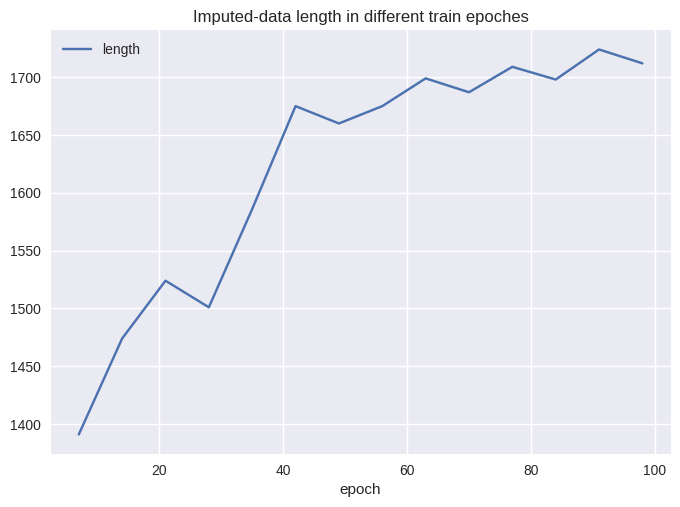

In [20]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
ax = df.plot(x='epoch', y=['length'], kind='line')
ax.set_title('Imputed-data length in different train epoches')
plt.show()

In [22]:
imputed_data.to_csv("beer_imputed_epoches-100.csv")

In [27]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!zip -rA 1.zip /content/exp2/checkpoint-7500

  adding: content/exp2/checkpoint-7500/ (stored 0%)
  adding: content/exp2/checkpoint-7500/special_tokens_map.json (deflated 60%)
  adding: content/exp2/checkpoint-7500/generation_config.json (deflated 24%)
  adding: content/exp2/checkpoint-7500/model.safetensors (deflated 7%)
  adding: content/exp2/checkpoint-7500/config.json (deflated 52%)
  adding: content/exp2/checkpoint-7500/vocab.json (deflated 59%)
  adding: content/exp2/checkpoint-7500/scheduler.pt (deflated 55%)
  adding: content/exp2/checkpoint-7500/trainer_state.json (deflated 76%)
  adding: content/exp2/checkpoint-7500/optimizer.pt (deflated 8%)
  adding: content/exp2/checkpoint-7500/tokenizer_config.json (deflated 54%)
  adding: content/exp2/checkpoint-7500/merges.txt (deflated 53%)
  adding: content/exp2/checkpoint-7500/rng_state.pth (deflated 25%)
  adding: content/exp2/checkpoint-7500/tokenizer.json (deflated 72%)
  adding: content/exp2/checkpoint-7500/training_args.bin (deflated 51%)


In [9]:
c_n = 500
res = []
for epoch in range(1,55,5):
  model = GReaT(llm='distilgpt2',
              batch_size=32,
              epochs=epoch,
              experiment_dir='exp3'
              )
  trainer = model.fit(dataset)
  imputed_data = model.impute(dataset, temperature=0.1,k=1, device = 'cuda:0') # 默认的max_length是200
  print("补全后的数据尺寸（行，列）：",imputed_data.shape)
  res.append({"epoch":epoch,"length":imputed_data.shape[0]})
  imputed_data.to_csv("exp3/beer_imputed_epoches-"+str(epoch)+".csv")

You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


100%|██████████| 2410/2410 [02:09<00:00, 18.54it/s]


补全后的数据尺寸（行，列）： (1789, 11)


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


100%|██████████| 2410/2410 [01:48<00:00, 22.19it/s]


补全后的数据尺寸（行，列）： (1415, 11)


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,1.385300


100%|██████████| 2410/2410 [01:49<00:00, 22.02it/s]


补全后的数据尺寸（行，列）： (1394, 11)


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,1.377700
1000,1.125000


Checkpoint destination directory exp3/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
100%|██████████| 2410/2410 [01:47<00:00, 22.45it/s]


补全后的数据尺寸（行，列）： (1458, 11)


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,1.374000
1000,1.112200
1500,1.052800


Checkpoint destination directory exp3/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-1000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
100%|██████████| 2410/2410 [01:45<00:00, 22.86it/s]


补全后的数据尺寸（行，列）： (1509, 11)


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,1.371900
1000,1.105100
1500,1.036400


Checkpoint destination directory exp3/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-1000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-1500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
100%|██████████| 2410/2410 [01:43<00:00, 23.30it/s]


补全后的数据尺寸（行，列）： (1515, 11)


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,1.370400
1000,1.100600
1500,1.026200
2000,0.986800


Checkpoint destination directory exp3/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-1000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-1500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
100%|██████████| 2410/2410 [01:42<00:00, 23.57it/s]


补全后的数据尺寸（行，列）： (1555, 11)


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,1.369400
1000,1.097400
1500,1.019300
2000,0.974100
2500,0.946800


Checkpoint destination directory exp3/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-1000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-1500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-2000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
100%|██████████| 2410/2410 [01:41<00:00, 23.85it/s]


补全后的数据尺寸（行，列）： (1587, 11)


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,1.368600
1000,1.095100
1500,1.014300
2000,0.965000
2500,0.932000
3000,0.912600


Checkpoint destination directory exp3/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-1000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-1500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-2000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-2500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
100%|██████████| 2410/2410 [01:40<00:00, 23.98it/s]


补全后的数据尺寸（行，列）： (1611, 11)


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,1.368000
1000,1.093300
1500,1.010600
2000,0.958200
2500,0.920900
3000,0.895800


Checkpoint destination directory exp3/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-1000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-1500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-2000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-2500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-3000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
100%|██████████| 2410/2410 [01:40<00:00, 24.02it/s]


补全后的数据尺寸（行，列）： (1616, 11)


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,1.367600
1000,1.091900
1500,1.007500
2000,0.952900
2500,0.912100
3000,0.883000
3500,0.865100


Checkpoint destination directory exp3/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-1000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-1500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-2000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-2500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory exp3/checkpoint-3000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
100%|██████████| 2410/2410 [01:38<00:00, 24.40it/s]

补全后的数据尺寸（行，列）： (1652, 11)


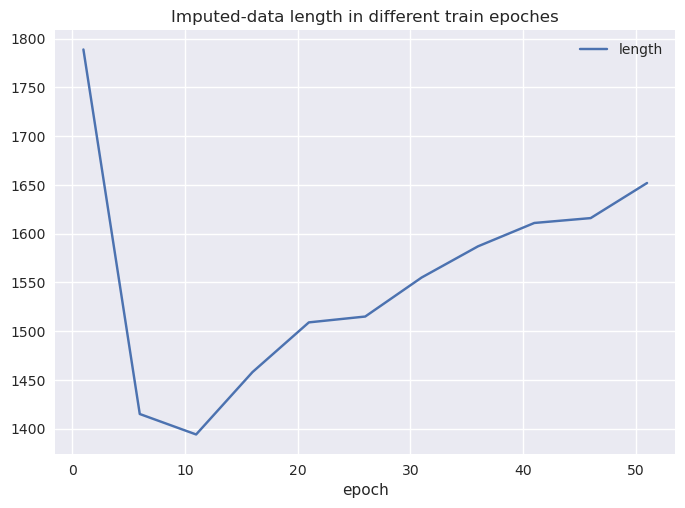

|        |    0 |    1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |   10 |
|:-------|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| epoch  |    1 |    6 |   11 |   16 |   21 |   26 |   31 |   36 |   41 |   46 |   51 |
| length | 1789 | 1415 | 1394 | 1458 | 1509 | 1515 | 1555 | 1587 | 1611 | 1616 | 1652 |


In [20]:
df = pd.DataFrame.from_dict(res)
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
ax = df.plot(x='epoch', y=['length'], kind='line')
ax.set_title('Imputed-data length in different train epoches')
plt.show()
markdown_table = df.transpose().to_markdown()
print(markdown_table)

## 完整

In [24]:
model = GReaT(llm='distilgpt2',
              batch_size=32,
              epochs=1000,
              save_steps = 760,
              logging_steps = 760,
              experiment_dir='exp3'
              )
trainer = model.fit(dataset)

You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
760,1.276500
1520,1.003100
2280,0.889000
3040,0.806700
3800,0.752400
4560,0.711300
5320,0.678900
6080,0.649900
6840,0.624700
7600,0.603200


In [25]:
c_n = 760
len_res = []
for epoch in range(10,1001,10):
  model = GReaT(llm='distilgpt2',
              batch_size=32,
              epochs=epoch,
              experiment_dir='exp3'
              )
  trainer = model.fit(dataset,resume_from_checkpoint='/root/data/exp3/checkpoint-'+str(c_n))
  c_n += 760
  imputed_data = model.impute(dataset, temperature=0.1,k=1, device = 'cuda:0') # 默认的max_length是200
  print("补全后的数据尺寸（行，列）：",imputed_data.shape)
  res.append({"epoch":epoch,"length":imputed_data.shape[0]})
  imputed_data.to_csv(f'beers-epoch-{epoch}-exp3.csv')

There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:57<00:00, 20.59it/s]


补全后的数据尺寸（行，列）： (1370, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:41<00:00, 23.73it/s]


补全后的数据尺寸（行，列）： (1578, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:36<00:00, 25.06it/s]


补全后的数据尺寸（行，列）： (1708, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:34<00:00, 25.38it/s]


补全后的数据尺寸（行，列）： (1721, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:29<00:00, 26.78it/s]


补全后的数据尺寸（行，列）： (1812, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:32<00:00, 26.06it/s]


补全后的数据尺寸（行，列）： (1752, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:33<00:00, 25.79it/s]


补全后的数据尺寸（行，列）： (1769, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:34<00:00, 25.46it/s]


补全后的数据尺寸（行，列）： (1745, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:44<00:00, 22.96it/s]


补全后的数据尺寸（行，列）： (1557, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:42<00:00, 23.54it/s]


补全后的数据尺寸（行，列）： (1607, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:45<00:00, 22.82it/s]


补全后的数据尺寸（行，列）： (1613, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:45<00:00, 22.83it/s]


补全后的数据尺寸（行，列）： (1595, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:46<00:00, 22.66it/s]


补全后的数据尺寸（行，列）： (1566, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:42<00:00, 23.58it/s]


补全后的数据尺寸（行，列）： (1619, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:44<00:00, 23.11it/s]


补全后的数据尺寸（行，列）： (1575, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:44<00:00, 22.98it/s]


补全后的数据尺寸（行，列）： (1610, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:45<00:00, 22.78it/s]


补全后的数据尺寸（行，列）： (1565, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:52<00:00, 21.35it/s]


补全后的数据尺寸（行，列）： (1476, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:46<00:00, 22.65it/s]


补全后的数据尺寸（行，列）： (1502, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:49<00:00, 22.08it/s]


补全后的数据尺寸（行，列）： (1494, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:50<00:00, 21.85it/s]


补全后的数据尺寸（行，列）： (1516, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:47<00:00, 22.40it/s]


补全后的数据尺寸（行，列）： (1432, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:54<00:00, 21.05it/s]


补全后的数据尺寸（行，列）： (1446, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:49<00:00, 21.99it/s]


补全后的数据尺寸（行，列）： (1456, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:50<00:00, 21.81it/s]


补全后的数据尺寸（行，列）： (1435, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:52<00:00, 21.46it/s]


补全后的数据尺寸（行，列）： (1436, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:54<00:00, 20.96it/s]


补全后的数据尺寸（行，列）： (1447, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:47<00:00, 22.34it/s]


补全后的数据尺寸（行，列）： (1420, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:55<00:00, 20.84it/s]


补全后的数据尺寸（行，列）： (1426, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:53<00:00, 21.15it/s]


补全后的数据尺寸（行，列）： (1419, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:54<00:00, 21.00it/s]


补全后的数据尺寸（行，列）： (1376, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:52<00:00, 21.50it/s]


补全后的数据尺寸（行，列）： (1362, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:50<00:00, 21.74it/s]


补全后的数据尺寸（行，列）： (1404, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:56<00:00, 20.78it/s]


补全后的数据尺寸（行，列）： (1392, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:56<00:00, 20.68it/s]


补全后的数据尺寸（行，列）： (1376, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:59<00:00, 20.24it/s]


补全后的数据尺寸（行，列）： (1357, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:58<00:00, 20.27it/s]


补全后的数据尺寸（行，列）： (1379, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:55<00:00, 20.84it/s]


补全后的数据尺寸（行，列）： (1374, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:58<00:00, 20.33it/s]


补全后的数据尺寸（行，列）： (1359, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:53<00:00, 21.29it/s]


补全后的数据尺寸（行，列）： (1381, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:54<00:00, 21.01it/s]


补全后的数据尺寸（行，列）： (1384, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:56<00:00, 20.72it/s]


补全后的数据尺寸（行，列）： (1358, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:53<00:00, 21.18it/s]


补全后的数据尺寸（行，列）： (1385, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:54<00:00, 21.12it/s]


补全后的数据尺寸（行，列）： (1348, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [01:56<00:00, 20.64it/s]


补全后的数据尺寸（行，列）： (1358, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:22<00:00,  4.28it/s]


补全后的数据尺寸（行，列）： (1368, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:43<00:00,  4.13it/s]


补全后的数据尺寸（行，列）： (1353, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [08:49<00:00,  4.55it/s]


补全后的数据尺寸（行，列）： (1358, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:30<00:00,  4.22it/s]


补全后的数据尺寸（行，列）： (1358, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:18<00:00,  4.32it/s]


补全后的数据尺寸（行，列）： (1355, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:32<00:00,  4.21it/s]


补全后的数据尺寸（行，列）： (1344, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:48<00:00,  4.09it/s]


补全后的数据尺寸（行，列）： (1341, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:36<00:00,  4.18it/s]


补全后的数据尺寸（行，列）： (1356, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:00<00:00,  4.46it/s]


补全后的数据尺寸（行，列）： (1350, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:33<00:00,  4.20it/s]


补全后的数据尺寸（行，列）： (1351, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:38<00:00,  4.17it/s]


补全后的数据尺寸（行，列）： (1344, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:38<00:00,  4.17it/s]


补全后的数据尺寸（行，列）： (1344, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:30<00:00,  4.23it/s]


补全后的数据尺寸（行，列）： (1344, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [10:03<00:00,  3.99it/s]


补全后的数据尺寸（行，列）： (1351, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:11<00:00,  4.37it/s]


补全后的数据尺寸（行，列）： (1351, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:16<00:00,  4.33it/s]


补全后的数据尺寸（行，列）： (1340, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [10:15<00:00,  3.91it/s]


补全后的数据尺寸（行，列）： (1340, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:28<00:00,  4.24it/s]


补全后的数据尺寸（行，列）： (1336, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:29<00:00,  4.23it/s]


补全后的数据尺寸（行，列）： (1339, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:02<00:00,  4.44it/s]


补全后的数据尺寸（行，列）： (1349, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [08:53<00:00,  4.52it/s]


补全后的数据尺寸（行，列）： (1337, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:16<00:00,  4.33it/s]


补全后的数据尺寸（行，列）： (1345, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:14<00:00,  4.35it/s]


补全后的数据尺寸（行，列）： (1341, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:59<00:00,  4.02it/s]


补全后的数据尺寸（行，列）： (1340, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [08:58<00:00,  4.47it/s]


补全后的数据尺寸（行，列）： (1338, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [08:53<00:00,  4.52it/s]


补全后的数据尺寸（行，列）： (1351, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [08:25<00:00,  4.77it/s]


补全后的数据尺寸（行，列）： (1345, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [08:58<00:00,  4.48it/s]


补全后的数据尺寸（行，列）： (1342, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:11<00:00,  4.37it/s]


补全后的数据尺寸（行，列）： (1337, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:12<00:00,  4.36it/s]


补全后的数据尺寸（行，列）： (1340, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:32<00:00,  4.21it/s]


补全后的数据尺寸（行，列）： (1330, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [08:39<00:00,  4.64it/s]


补全后的数据尺寸（行，列）： (1340, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [08:48<00:00,  4.56it/s]


补全后的数据尺寸（行，列）： (1342, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:28<00:00,  4.24it/s]


补全后的数据尺寸（行，列）： (1344, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:44<00:00,  4.12it/s]


补全后的数据尺寸（行，列）： (1346, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:19<00:00,  4.30it/s]


补全后的数据尺寸（行，列）： (1329, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:02<00:00,  4.44it/s]


补全后的数据尺寸（行，列）： (1342, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:04<00:00,  4.42it/s]


补全后的数据尺寸（行，列）： (1335, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:18<00:00,  4.31it/s]


补全后的数据尺寸（行，列）： (1334, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


100%|██████████| 2410/2410 [09:08<00:00,  4.39it/s]


补全后的数据尺寸（行，列）： (1338, 11)


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss


 69%|██████▉   | 1668/2410 [06:35<02:55,  4.22it/s]


KeyboardInterrupt: 

In [22]:
!ls exp3

beer_imputed_epoches-1.csv   beer_imputed_epoches-36.csv  checkpoint-1500
beer_imputed_epoches-11.csv  beer_imputed_epoches-41.csv  checkpoint-2000
beer_imputed_epoches-16.csv  beer_imputed_epoches-46.csv  checkpoint-2500
beer_imputed_epoches-21.csv  beer_imputed_epoches-51.csv  checkpoint-3000
beer_imputed_epoches-26.csv  beer_imputed_epoches-6.csv   checkpoint-3500
beer_imputed_epoches-31.csv  checkpoint-1000		  checkpoint-500


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [33]:
df = pd.DataFrame.from_dict(res)
print(df.transpose().to_markdown())

|        |    0 |    1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |   10 |   11 |   12 |   13 |   14 |   15 |   16 |   17 |   18 |   19 |   20 |   21 |   22 |   23 |   24 |   25 |   26 |   27 |   28 |   29 |   30 |   31 |   32 |   33 |   34 |   35 |   36 |   37 |   38 |   39 |   40 |   41 |   42 |   43 |   44 |   45 |   46 |   47 |   48 |   49 |   50 |   51 |   52 |   53 |   54 |   55 |   56 |   57 |   58 |   59 |   60 |   61 |   62 |   63 |   64 |   65 |   66 |   67 |   68 |   69 |   70 |   71 |   72 |   73 |   74 |   75 |   76 |   77 |   78 |   79 |   80 |   81 |   82 |   83 |   84 |   85 |   86 |   87 |   88 |   89 |   90 |   91 |   92 |   93 |   94 |   95 |
|:-------|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:

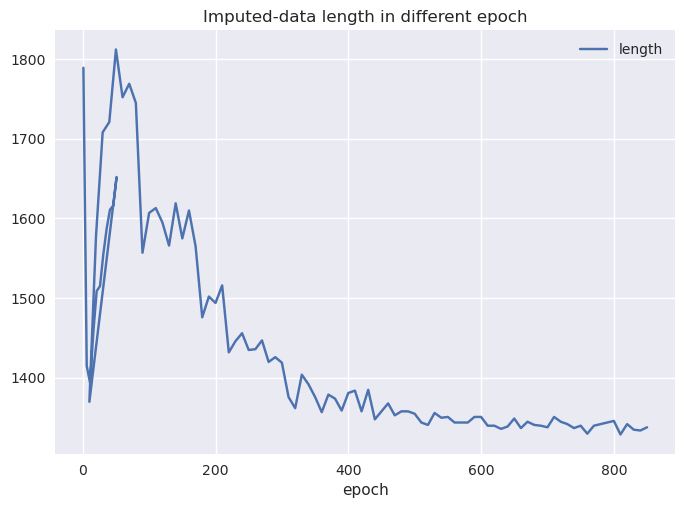

In [34]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
ax = df.plot(x='epoch', y=['length'], kind='line')
ax.set_title('Imputed-data length in different epoch')
plt.show()

## 评测性能

In [35]:
!ls *.csv


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


beers-epoch-10-exp3.csv   beers-epoch-380-exp3.csv  beers-epoch-660-exp3.csv
beers-epoch-100-exp3.csv  beers-epoch-390-exp3.csv  beers-epoch-670-exp3.csv
beers-epoch-110-exp3.csv  beers-epoch-40-exp3.csv   beers-epoch-680-exp3.csv
beers-epoch-120-exp3.csv  beers-epoch-400-exp3.csv  beers-epoch-690-exp3.csv
beers-epoch-130-exp3.csv  beers-epoch-410-exp3.csv  beers-epoch-70-exp3.csv
beers-epoch-140-exp3.csv  beers-epoch-420-exp3.csv  beers-epoch-700-exp3.csv
beers-epoch-150-exp3.csv  beers-epoch-430-exp3.csv  beers-epoch-710-exp3.csv
beers-epoch-160-exp3.csv  beers-epoch-440-exp3.csv  beers-epoch-720-exp3.csv
beers-epoch-170-exp3.csv  beers-epoch-450-exp3.csv  beers-epoch-730-exp3.csv
beers-epoch-180-exp3.csv  beers-epoch-460-exp3.csv  beers-epoch-740-exp3.csv
beers-epoch-190-exp3.csv  beers-epoch-470-exp3.csv  beers-epoch-750-exp3.csv
beers-epoch-20-exp3.csv   beers-epoch-480-exp3.csv  beers-epoch-760-exp3.csv
beers-epoch-200-exp3.csv  beers-epoch-490-exp3.csv  beers-epoch-770-exp3.csv


In [1]:
from eva_metrics import process_beers
import pandas as pd

In [2]:
data_df = pd.read_csv("raha/datasets/beers/dirty.csv")
label_df = pd.read_csv("raha/datasets/beers/clean.csv")
res_pr = []
for epoch in range(10,860,10):
    name = f'beers-epoch-{epoch}-exp3.csv'
    result_df = pd.read_csv(name)
    p,r = process_beers(data_df,label_df,result_df)
    res_pr.append({"epoch":epoch,"precision":p,"recall":r})

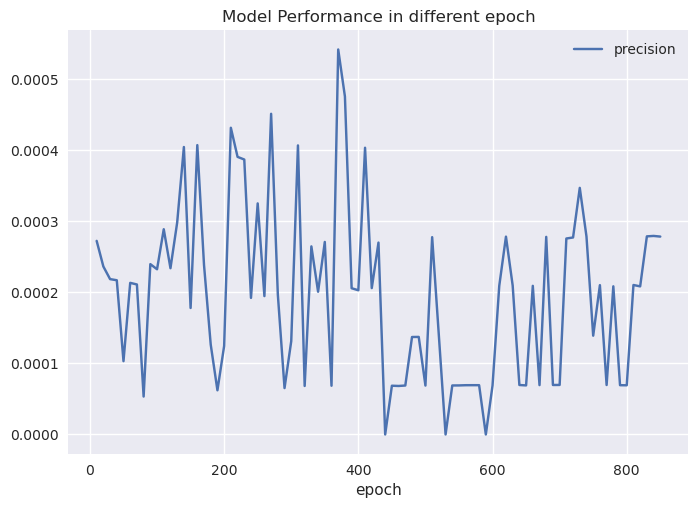

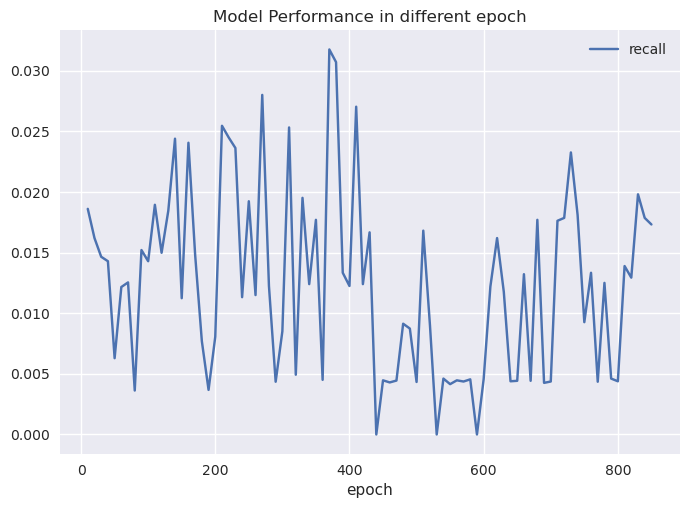

In [6]:
df = pd.DataFrame.from_dict(res_pr)
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
ax = df.plot(x='epoch', y=["precision"], kind='line')
ax.set_title('Model Performance in different epoch')
ax1 = df.plot(x='epoch', y=["recall"], kind='line')
ax1.set_title('Model Performance in different epoch')
plt.show()

In [7]:
print(df.to_markdown())

|    |   epoch |   precision |     recall |
|---:|--------:|------------:|-----------:|
|  0 |      10 | 0.000272517 | 0.0186047  |
|  1 |      20 | 0.000236435 | 0.0161943  |
|  2 |      30 | 0.000218687 | 0.014652   |
|  3 |      40 | 0.000217108 | 0.0142857  |
|  4 |      50 | 0.000103173 | 0.00628931 |
|  5 |      60 | 0.000213424 | 0.0121581  |
|  6 |      70 | 0.000211138 | 0.0125392  |
|  7 |      80 | 5.33817e-05 | 0.00362319 |
|  8 |      90 | 0.000239779 | 0.0152091  |
|  9 |     100 | 0.000232558 | 0.0142857  |
| 10 |     110 | 0.0002889   | 0.0189394  |
| 11 |     120 | 0.000234014 | 0.0149813  |
| 12 |     130 | 0.000298312 | 0.0184502  |
| 13 |     140 | 0.000404648 | 0.0243902  |
| 14 |     150 | 0.000178042 | 0.011236   |
| 15 |     160 | 0.000407308 | 0.024055   |
| 16 |     170 | 0.000238663 | 0.0148148  |
| 17 |     180 | 0.000126534 | 0.00769231 |
| 18 |     190 | 6.21813e-05 | 0.00367647 |
| 19 |     200 | 0.000124603 | 0.00806452 |
| 20 |     210 | 0.000431726 | 0